# DECISION TREE WITH PYTHON (SCI-KIT Learn)

In this piece, I am going to introduce the Decision Tree Classifier Model. I have used IRIS data in this model. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. Let’s start to code our model step by step. You can see sufficient information in the comment lines of the code.

In [1]:
# %matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier




In [2]:
# Import the dataset

data = pd.read_csv('Iris.csv')
df = data.drop('Id',axis=1)


In [3]:
# Check NULL in data 

df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [4]:
# check type of data

df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
# Model Summary Statistics

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


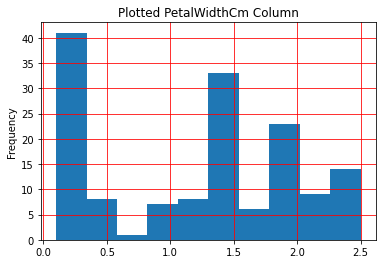

In [6]:
# Visualization of PetalWidth Column. You can visualize all the columns using histogram.

df['PetalWidthCm'].plot.hist()
plt.grid(color = 'red')
plt.title('Plotted PetalWidthCm Column')
plt.show()

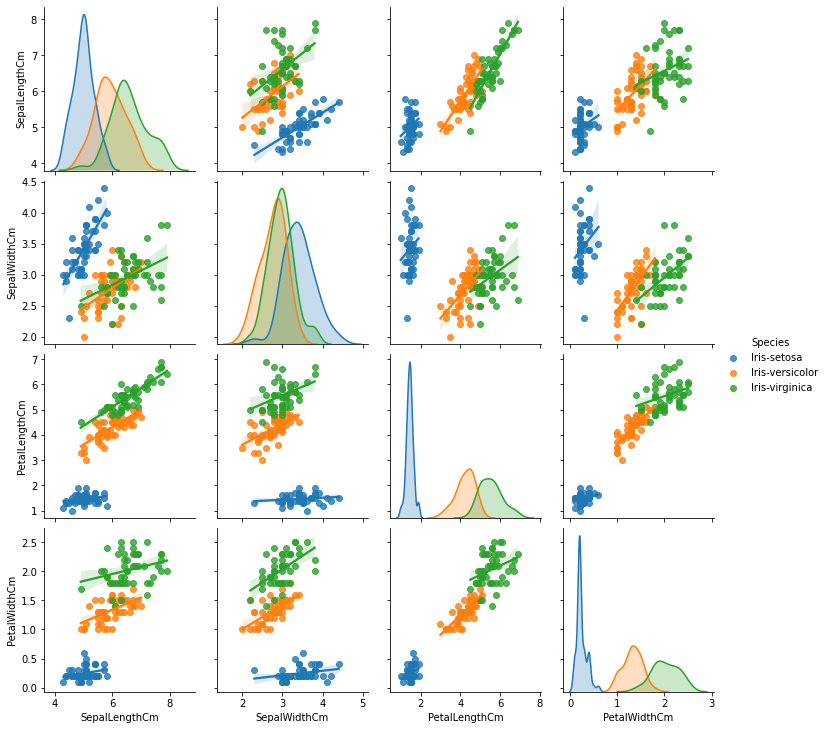

In [7]:
# Regression on graphs using seaborn library

sns.pairplot(df, kind = "reg",  hue='Species')  # make a regression line for eac hue and each variables

In [8]:
#  Extracting Independent and Dependent Variable from the dataset

all_inputs = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
all_classes = df['Species'].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, 
                                                                train_size=0.7, random_state=1)


In [9]:
# Splitting the dataset into Training set and Test set

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, 
                                                                train_size=0.7, random_state=1)


In [10]:
#  Training the model on training set

from sklearn.metrics import accuracy_score, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)
#dtc.score(test_inputs, test_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
# Predicting from Test data

predictions= dtc.predict(test_inputs)
print(classification_report(test_classes, predictions))
#score= accuracy_score(test_classes, predictions)   #predicts accuracy between 0 and 1
#score
print('\nAccuracy: {0:.4f}'.format(accuracy_score(test_classes, predictions)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45


Accuracy: 0.9556


In [12]:
# Import necessary libraries for graph viz ... For Visualization of Decision tree and store it in pdf.
  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from graphviz import Source
from os import system
from sklearn import tree

# Visualize the graph

dot_data = tree.export_graphviz(dtc, out_file= None, 
         feature_names= ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                                class_names=["setosa", "versicolor", "virginica"],
              filled=True, 
              rounded = True,
              label= 'all',special_characters = True)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph = pydotplus.graph_from_dot_data(dot_data)
#Image(graph.create_png())
graph = graphviz.Source(dot_data)
graph.render("iris_png")
graph.render("iris_png",view = True)

'iris_png.pdf'

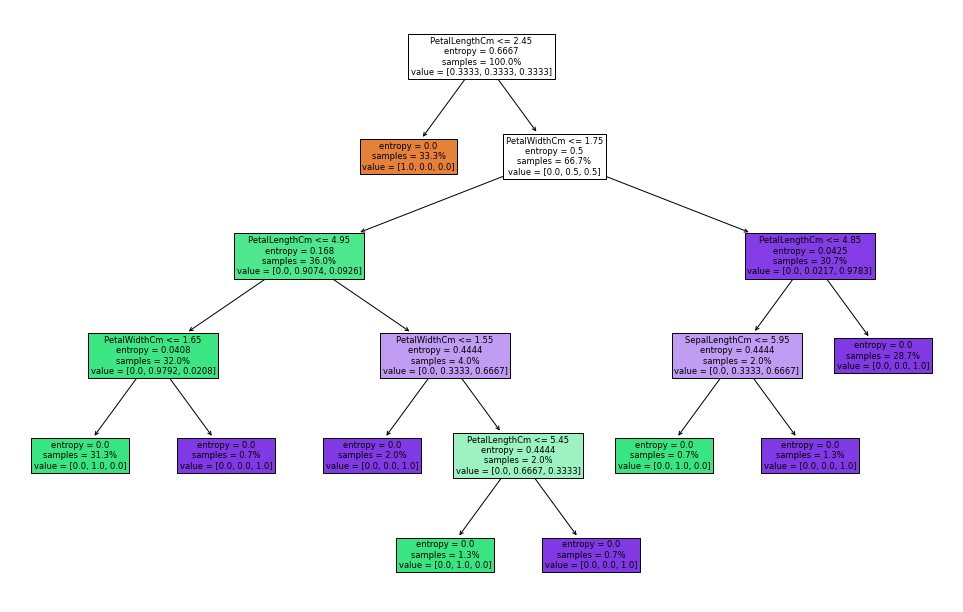

In [22]:
# Plotting the predicted values

from sklearn import tree
plt.figure(figsize=(17,11))
tree.plot_tree(dtc.fit(all_inputs, all_classes),feature_names=list(df.columns),proportion=True,filled=True,precision=4)
plt.show()
